# CURRENT QUIVER PLOT

In [49]:
#masukin library dulu 
import os
os.environ['PROJ_LIB'] = r'C:/Users/user/anaconda3/Lib/site-packages/mpl_toolkits/basemap'
import netCDF4 as nc
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap

# Input Data Arus

In [2]:
#masukin lokasi .nc nya dimana
fn='D:/smt7/asisten andat/3hrly.nc4'
#buka file nc nya dan liat isinya ada apa aja (variabel dan dimensi)
ds=nc.Dataset(fn)
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridWriter2)
Original Dataset = GLBu0.08/expt_19.1/2000/3hrly; Translation Date = 2020-09-22T03:29:47.900Z
    geospatial_lat_min: -7.28000020980835
    geospatial_lat_max: -2.319999933242798
    geospatial_lon_min: 94.9599609375
    geospatial_lon_max: 102.0
    dimensions(sizes): time(248), depth(1), lat(63), lon(89)
    variables(dimensions): int16 water_u(time,depth,lat,lon), float64 time(time), float64 depth(depth), float64 lat(lat), float64 lon(lon), int16 water_v

## Deklarasi Data Arus
data arus yang digunakan dalam plot quiver merupakan data spasial, jadi gausah diambil di grid tertentu

In [97]:
u=np.flipud(ds.variables['water_u'][0,0,:,:63])
v=np.flipud(ds.variables['water_v'][0,0,:,:63])
lon=ds.variables['lon'][:63]
lat=np.flipud(ds.variables['lat'][:63])
time=ds.variables['time'][:]

u2=np.ma.MaskedArray.tolist(u)
v2=np.ma.MaskedArray.tolist(v)
#melihat dimensi masing2 variabel
print('dimensi u',np.shape(u2))
print('dimensi v',np.shape(v2))
print('dimensi lon',np.shape(lon2))
print('dimensi lat',np.shape(lat2))
print('dimensi time',np.shape(time))

dimensi u (63, 63)
dimensi v (63, 63)
dimensi lon (63,)
dimensi lat (63,)
dimensi time (248,)


In [87]:
points = np.meshgrid(lon,lat)

## Membuat Current Quiver Plot

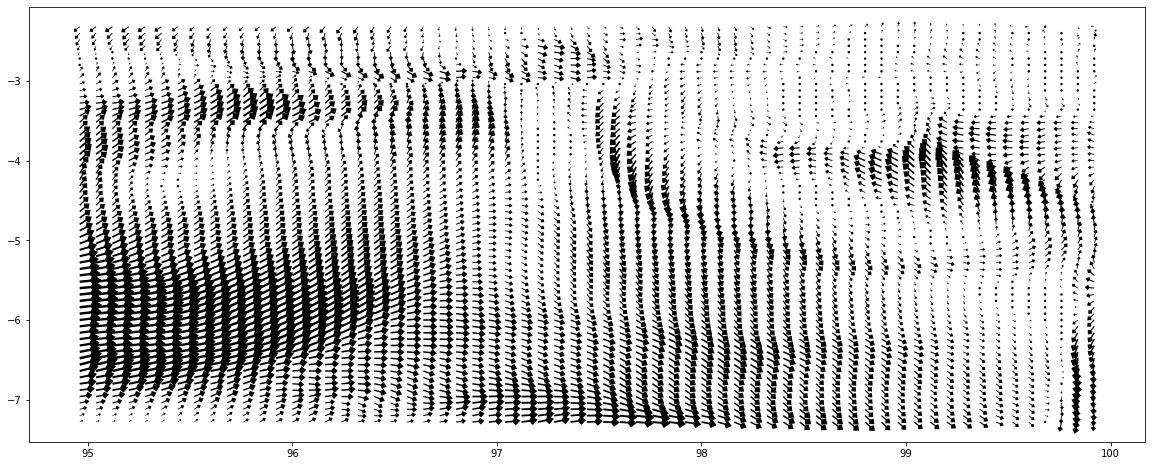

In [61]:
#Quiveeerrrrrr
import numpy as np
fig, ax = plt.subplots(figsize=(20, 8))
q = ax.quiver(lon, lat, u, v, headwidth=5, headlength=3, minshaft=3)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

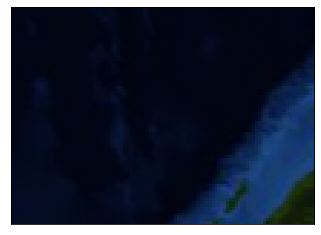

In [52]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=95,llcrnrlat=-2.3,urcrnrlon=102,urcrnrlat=-7.3,
             resolution='i', projection='merc', lat_0 = 39.5, lon_0 = 0.)

map.bluemarble()

map.drawcoastlines()

plt.show()

In [98]:
#map
map = Basemap(llcrnrlon=95,llcrnrlat=-2.3,urcrnrlon=102,urcrnrlat=-7.3,
             resolution='i', projection='merc')


RuntimeError: Can not put single artist in more than one figure

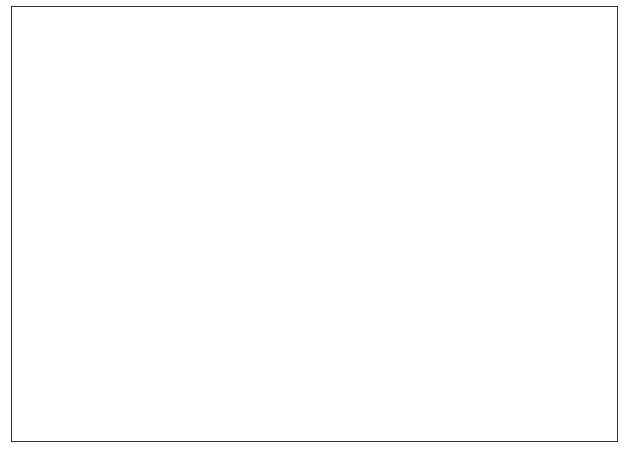

In [94]:
fig, ax = plt.subplots(figsize=(20, 8))
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray',lake_color='aqua')
map.drawmapboundary(fill_color='white')
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
Q = map.quiver(x,y,u,v,scale=10, width=0.0012)
qk = plt.quiverkey(Q, 0.1, 0.1, 0.1, '0.1 m/s', labelpos='W')

In [99]:
speed = np.sqrt(u*u + v*v)

x, y = map(lon, lat)

yy = np.arange(0, y.shape[0], 4)
xx = np.arange(0, x.shape[1], 4)

points = np.meshgrid(yy, xx)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#cc9955', lake_color='aqua', zorder = 0)
map.drawcoastlines(color = '0.15')

map.quiver(x[points], y[points], 
    u10[points], v10[points], speed[points],
    cmap=plt.cm.autumn)

plt.show()

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning:

invalid value encountered in sqrt



IndexError: tuple index out of range